In [1]:
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import time
%matplotlib inline

# READ AND DEFINE DATA SET
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()
# numFeatures = the number of words extracted from each email = number of input nodes
numFeatures = trainX.shape[1]
# numLabels = number of classes we are predicting (here just 2: Ham or Spam) = number of output nodes
numLabels = trainY.shape[1]

loading training data
loading test data


initial input weights: [[ 0.00409399 -0.00457005 -0.00469943  0.00737868  0.00572969]
 [ 0.01690714  0.00653632  0.00218543 -0.00697609 -0.01825775]
 [ 0.0018333   0.00182021 -0.00391219 -0.00595224 -0.0086149 ]
 ..., 
 [-0.01350973 -0.01200246 -0.00776011 -0.00306294 -0.00500573]
 [-0.00501641 -0.01263148 -0.01286929 -0.00691761  0.00603941]
 [-0.01088441 -0.00421671  0.00660999  0.00272577  0.00030339]]
initial hidden: [[ 0.01425428 -0.00882506]
 [-0.00220674  0.00116308]
 [-0.00986179 -0.00816871]
 [-0.01040369 -0.01192335]
 [-0.00293965 -0.00478951]]
initial output bias: [-0.01274253 -0.00274669 -0.00163882  0.00071533  0.00019768]

mse: 238.343

mse: 235.975

mse: 18.9846

mse: 5.38242

mse: 3.92926

mse: 2.8145

mse: 2.22301

mse: 1.64663

mse: 1.47858

mse: 1.38405
[[  9.99873996e-01   1.25998617e-04]
 [  5.72291261e-04   9.99427617e-01]
 [  1.21487770e-04   9.99878526e-01]
 [  9.99503970e-01   4.95960296e-04]
 [  1.79745420e-03   9.98202562e-01]
 [  1.61107816e-03   9.98388886e

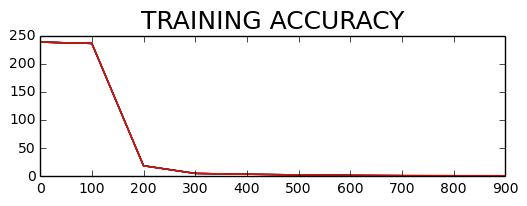

In [2]:
# DEFINE PLACEHOLDERS
n_i = numFeatures
n_o = numLabels
n_samples = trainX.shape[0]
n_h = 5
n_h_layers = 2
x = tf.placeholder('float32', [None, n_i]) # input placeholder
y_ = tf.placeholder('float32', [None, n_o]) # label placeholder

# DEFINE VARIABLES
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

W1 = init_weights([n_i, n_h])
W2 = init_weights([n_h, n_o])
b = init_weights([n_h])

# DEFINE MODEL WITH SIGMOID ACTIVATION
def model(X, w_h, w_o, bias):
    h = tf.nn.sigmoid(tf.add(tf.matmul(X, w_h), bias[0]))
    return tf.matmul(h, w_o)

y = model(x, W1, W2, b)

# DEFINE COST FUNCTION
cost = tf.reduce_sum(tf.pow(tf.nn.sigmoid(y) - y_, 2) / 2)

# DEFINE OPTIMIZER AND PREDICTION 
train_op = tf.train.MomentumOptimizer(0.01, 0.95).minimize(cost)

predict_op = tf.nn.sigmoid(y)

# INITIALIZE SESSION
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

# print inital weights and output bias
print("initial input weights:", W1.eval(session=sess))
print("initial hidden:", W2.eval(session=sess))
print("initial output bias:", b.eval(session=sess))

# GRAPH LIVE UPDATING
epoch_values = []
accuracy_values = []
# Turn on interactive plotting
plt.ion()
# Create the main, super plot
fig = plt.figure()
# Create two subplots on their own axes and give titles
ax1 = plt.subplot("211")
ax1.set_title("TRAINING ACCURACY", fontsize=18)

# iterate 1000 times
for i in range(1000):
    _, loss_value = sess.run([train_op, cost], feed_dict={x: trainX, y_: trainY})
    if i%100 == 0:
        #loss_value = sess.run(accuracy_op, feed_dict={x: trainX, y_: trainY})
        print("\nmse:", loss_value)
        epoch_values.append(i)
        accuracy_values.append(loss_value)
        accuracyLine, = ax1.plot(epoch_values, accuracy_values)
        fig.canvas.draw()
        
# RUN THROUGH TEST DATA 
predictions = sess.run(predict_op, feed_dict={x: testX, y_: testY})
correct = 0
for i in range(predictions.shape[0]):
    test_result = predictions[i]
    label_result = testY[i]
    test = 0
    label = 0
    if (test_result[0] > test_result[1]):
        test = 0
    else:
        test = 1
    if (label_result[0] > label_result[1]):
        label = 0
    else:
        label = 1
    if test == label:
        correct = correct + 1
        
correct = (correct / predictions.shape[0]) * 100
print(sess.run(predict_op, feed_dict={x: testX, y_: testY}))  
print(testY)
print("final accuracy on test set: %s" %str(correct))

